In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


# this competion is about predict the store sales

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
pd.set_option('display.max_columns', 200)

# reading all data

In [3]:
df_train=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
df_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
data_test=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')
data_test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [5]:
df_holiday=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')
df_holiday

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [6]:
df_oil=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


# merging all data

In [7]:
# Perform the merge based on the 'date' column
merged_df = pd.merge(df_train, df_oil, on='date')

# Perform the second merge between the previously merged dataframe and df_holiday based on the 'date' column
merged_df = pd.merge(merged_df, df_holiday, on='date')

# Print the merged dataframe
merged_df

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...
352831,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
352832,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
352833,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
352834,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [8]:
df_store=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
df_store.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [9]:
# Perform the second merge between the previously merged dataframe and df_holiday based on the 'date' column
merged_df = pd.merge(merged_df, df_store, on='store_nbr')

# Print the merged dataframe
merged_df

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,NaN,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352831,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
352832,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
352833,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
352834,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6


In [10]:
df_transactions=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/transactions.csv')
df_transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [11]:
# Perform the merge based on the 'date' and 'store_nbr' columns
final_df = pd.merge(merged_df, df_transactions, on=['date', 'store_nbr'])

# Print the final merged dataframe
final_df

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster,transactions
0,73062,2013-02-11,1,AUTOMOTIVE,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396
1,73063,2013-02-11,1,BABY CARE,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396
2,73064,2013-02-11,1,BEAUTY,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396
3,73065,2013-02-11,1,BEVERAGES,172.000,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396
4,73066,2013-02-11,1,BOOKS,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155
322043,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155
322044,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155
322045,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155


In [12]:
final_df.isna().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
dcoilwtico      22044
type_x              0
locale              0
locale_name         0
description         0
transferred         0
city                0
state               0
type_y              0
cluster             0
transactions        0
dtype: int64

# droping null values

In [13]:
data_train=final_df.dropna()
data_train.shape

(300003, 17)

In [14]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300003 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            300003 non-null  int64  
 1   date          300003 non-null  object 
 2   store_nbr     300003 non-null  int64  
 3   family        300003 non-null  object 
 4   sales         300003 non-null  float64
 5   onpromotion   300003 non-null  int64  
 6   dcoilwtico    300003 non-null  float64
 7   type_x        300003 non-null  object 
 8   locale        300003 non-null  object 
 9   locale_name   300003 non-null  object 
 10  description   300003 non-null  object 
 11  transferred   300003 non-null  bool   
 12  city          300003 non-null  object 
 13  state         300003 non-null  object 
 14  type_y        300003 non-null  object 
 15  cluster       300003 non-null  int64  
 16  transactions  300003 non-null  int64  
dtypes: bool(1), float64(2), int64(5), object(9)
memo

In [15]:
data_train['date']=pd.to_datetime(data_train['date'])

In [16]:
data_train['type_x'].value_counts()

Holiday       185823
Event          57684
Additional     39666
Transfer       11946
Bridge          4884
Name: type_x, dtype: int64

In [17]:
data_train['type_y'].value_counts()

D    102597
C     86163
A     48147
B     41976
E     21120
Name: type_y, dtype: int64

In [18]:
data_train=data_train.rename({'type_x':'event_type','type_y':'store_type'},axis=1)
data_train

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,event_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
0,73062,2013-02-11,1,AUTOMOTIVE,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396
1,73063,2013-02-11,1,BABY CARE,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396
2,73064,2013-02-11,1,BEAUTY,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396
3,73065,2013-02-11,1,BEVERAGES,172.000,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396
4,73066,2013-02-11,1,BOOKS,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155
322043,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155
322044,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155
322045,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155


In [19]:
all_data=pd.concat([data_train, data_train], axis=0)

In [20]:
all_data.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,event_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions
0,73062,2013-02-11,1,AUTOMOTIVE,0.0,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396
1,73063,2013-02-11,1,BABY CARE,0.0,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396
2,73064,2013-02-11,1,BEAUTY,0.0,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396
3,73065,2013-02-11,1,BEVERAGES,172.0,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396
4,73066,2013-02-11,1,BOOKS,0.0,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396


# features engineering

**extract year ,month ,day ,day name ,quarter from date column**

In [21]:
def datetime(all_data):
    all_data['date']=pd.to_datetime(all_data['date'])
    all_data['year']=all_data['date'].dt.year
    all_data['month']=all_data['date'].dt.month
    all_data['day']=all_data['date'].dt.day
    all_data['quarter']=all_data['date'].dt.quarter
    all_data['dayofweek']=all_data['date'].dt.day_of_week
    all_data['dayname']=all_data['date'].dt.day_name()
    return all_data
data=datetime(all_data)

In [22]:
data

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,event_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions,year,month,day,quarter,dayofweek,dayname
0,73062,2013-02-11,1,AUTOMOTIVE,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396,2013,2,11,1,0,Monday
1,73063,2013-02-11,1,BABY CARE,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396,2013,2,11,1,0,Monday
2,73064,2013-02-11,1,BEAUTY,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396,2013,2,11,1,0,Monday
3,73065,2013-02-11,1,BEVERAGES,172.000,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396,2013,2,11,1,0,Monday
4,73066,2013-02-11,1,BOOKS,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D,13,396,2013,2,11,1,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155,2017,8,15,3,1,Tuesday
322043,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155,2017,8,15,3,1,Tuesday
322044,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155,2017,8,15,3,1,Tuesday
322045,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6,2155,2017,8,15,3,1,Tuesday


In [23]:
data.describe()

,id,store_nbr,sales,onpromotion,dcoilwtico,cluster,transactions,year,month,day,quarter,dayofweek
count,6.000060e+05,600006.000000,600006.000000,600006.000000,600006.000000,600006.000000,600006.000000,600006.000000,600006.000000,600006.000000,600006.000000,600006.000000
mean,1.654259e+06,26.987900,403.274688,3.625204,64.077912,8.532835,1735.247608,2014.965130,7.543175,15.037070,2.847982,1.965240
std,7.824841e+05,15.599699,1242.565147,15.591137,25.147661,4.714524,1051.994860,1.243705,3.218101,9.150616,0.999941,1.449819
min,7.306200e+04,1.000000,0.000000,0.000000,27.960000,1.000000,54.000000,2013.000000,1.000000,1.000000,1.000000,0.000000
25%,9.848102e+05,13.000000,1.000000,0.000000,44.660000,4.000000,1033.000000,2014.000000,5.000000,7.000000,2.000000,1.000000
50%,1.841086e+06,27.000000,19.000000,0.000000,51.440000,9.000000,1413.000000,2015.000000,7.000000,12.000000,3.000000,2.000000
75%,2.188370e+06,40.000000,240.000000,1.000000,94.740000,13.000000,2152.000000,2016.000000,11.000000,24.000000,4.000000,3.000000
max,3.000887e+06,54.000000,124717.000000,716.000000,107.950000,17.000000,8359.000000,2017.000000,12.000000,31.000000,4.000000,4.000000


In [24]:
data.isna().sum()

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
dcoilwtico      0
event_type      0
locale          0
locale_name     0
description     0
transferred     0
city            0
state           0
store_type      0
cluster         0
transactions    0
year            0
month           0
day             0
quarter         0
dayofweek       0
dayname         0
dtype: int64

In [25]:
data.to_csv('data.csv',index=False)

# Exploratory Data Analysis(EDA)

# store types count

Text(0.5, 1.0, 'store types count')

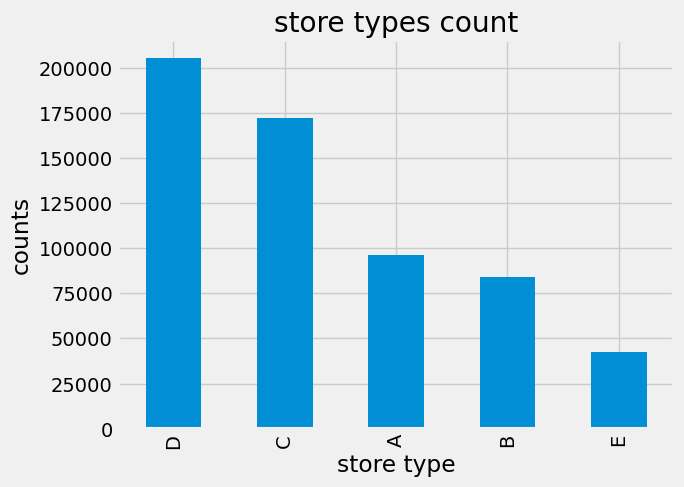

In [26]:
data['store_type'].value_counts().plot(kind='bar')
plt.xlabel('store type')
plt.ylabel('counts')
plt.title('store types count')

# events type counts

Text(0.5, 1.0, 'event types count')

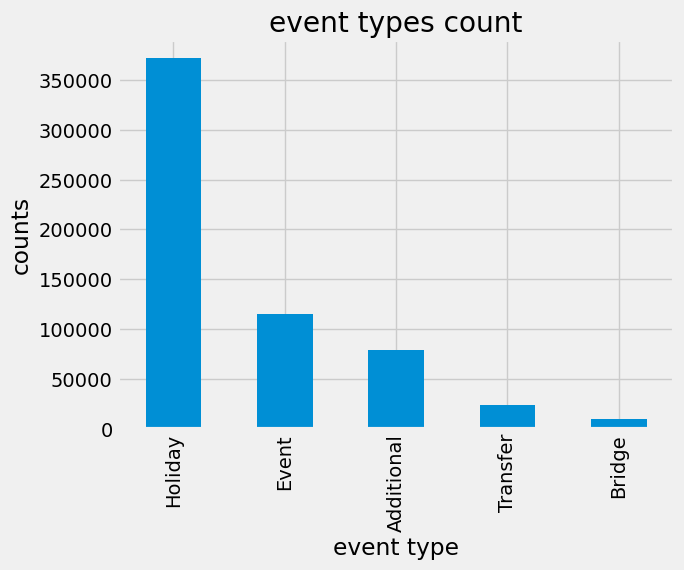

In [27]:
data['event_type'].value_counts().plot(kind='bar')
plt.xlabel('event type')
plt.ylabel('counts')
plt.title('event types count')

**The most of sales are in holidays with over than 300% from other events**

Text(0.5, 1.0, 'transferred types count')

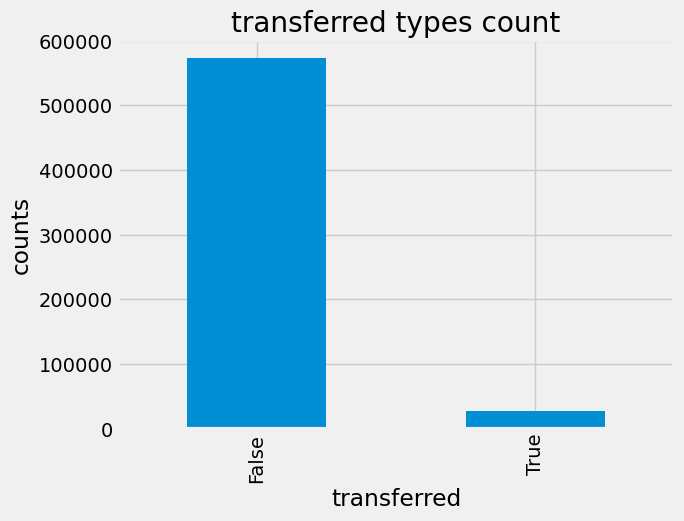

In [28]:
data['transferred'].value_counts().plot(kind='bar')
plt.xlabel('transferred')
plt.ylabel('counts')
plt.title('transferred types count')

# sum of sales per years,months,days and quarter

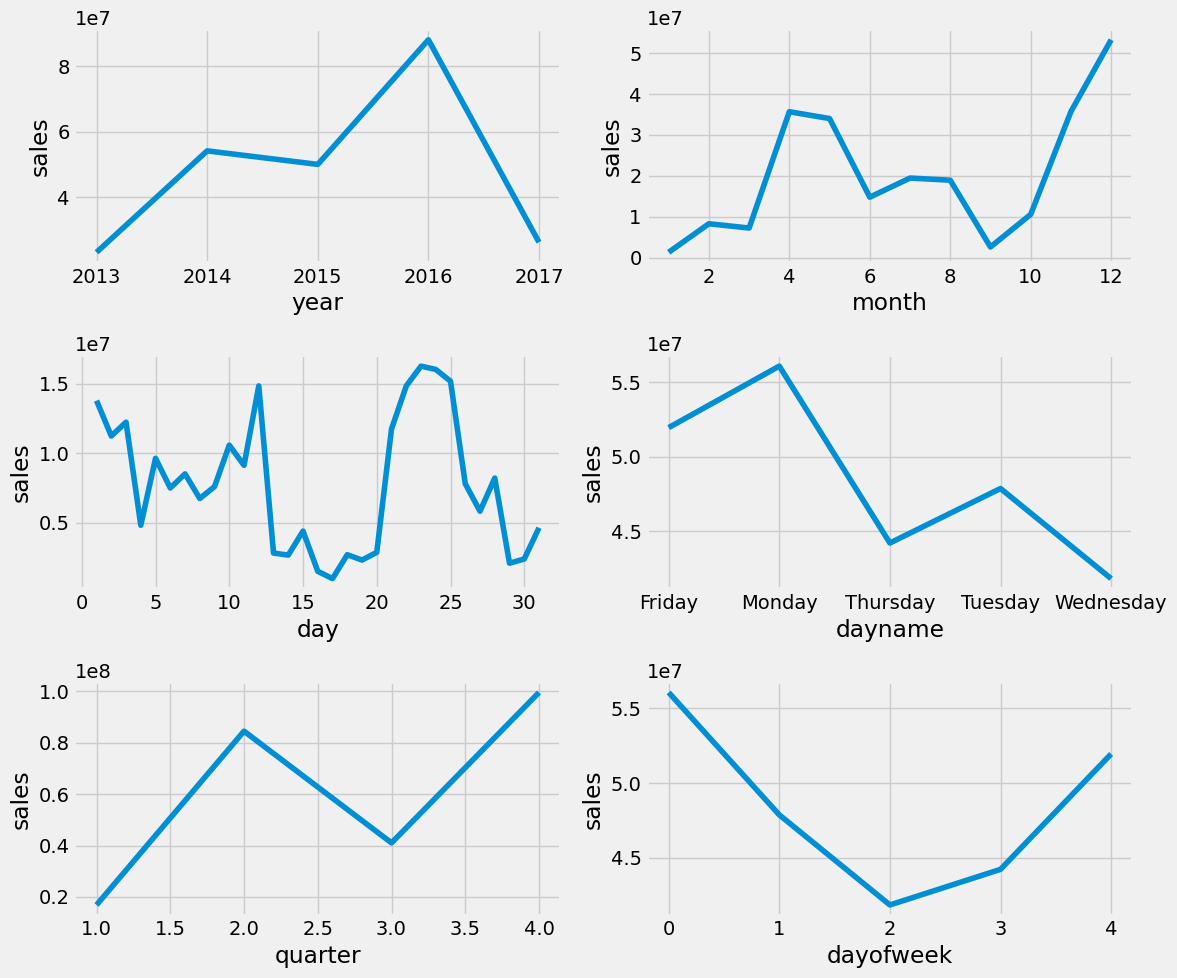

In [29]:
columns = ['year', 'month', 'day', 'dayname', 'quarter', 'dayofweek']

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for ind, column in enumerate(columns):
    grouped_data = data.groupby(column)['sales'].sum()
    grouped_data = pd.DataFrame(grouped_data).reset_index()

    sns.lineplot(data=grouped_data, x=column, y='sales', ax=axes[ind])

plt.tight_layout()
plt.show()

1. **The highest sales are in 2016 and the lowest sales are in 2013 and 2017**
2. **The highest sales are in december and the lowest sales are in january and september and this is because of holidays**
3. **The highest sales day are in monday and friday and the lowest sales are in thursday and wednesday**
4. **The highest sales quarter are in fourth quarter and this is because holiday in december**

#  Top of total sales for the family

In [30]:
data.groupby('family')['sales'].sum().reset_index().sort_values(by='sales',ascending=False)

,family,sales
12,GROCERY I,7.794930e+07
3,BEVERAGES,4.779350e+07
30,PRODUCE,2.979330e+07
7,CLEANING,2.069997e+07
8,DAIRY,1.378160e+07
5,BREAD/BAKERY,8.621319e+06
28,POULTRY,7.052101e+06
24,MEATS,6.830656e+06
25,PERSONAL CARE,5.281772e+06
9,DELI,5.089324e+06


In [31]:
import plotly.express as px

# Perform the groupby and sum operation
grouped_data=data.groupby('family')['sales'].sum().reset_index().sort_values(by='sales',ascending=False)
# Create a bar plot using Plotly Express
fig = px.bar(grouped_data, x='family', y='sales', title='Total Sales by Family',
             labels={'family': 'Family', 'sales': 'Total Sales'})

# Display the plot
fig.show()

**the most important sales for families are grocery and beverages and lowest important are books**

# Total sales by store number

In [32]:
grouped_data=data.groupby('store_nbr')['sales'].sum().reset_index().sort_values(by='sales',ascending=False)
grouped_data

,store_nbr,sales
43,44,1.345384e+07
44,45,1.222182e+07
46,47,1.112691e+07
2,3,1.106702e+07
48,49,9.923777e+06
45,46,9.189192e+06
47,48,7.758808e+06
50,51,7.496225e+06
7,8,6.609618e+06
10,11,6.445944e+06


1. **the highest sales are for stores number 43 & 44 & 46 & 2.**
2. **the lowest sales are for store number 51.**

In [33]:
# Perform the groupby and sum operation
grouped_data=data.groupby('store_nbr')['sales'].sum().reset_index()
# Create a bar plot using Plotly Express
fig = px.bar(grouped_data, x='store_nbr', y='sales', title='Total Sales by store number',
             labels={'store_nbr': 'Store Number', 'sales': 'Total Sales'})

# Display the plot
fig.show()

# Total sales by locality

In [34]:
# Perform the groupby and sum operation
grouped_data=data.groupby('locale')['sales'].sum().reset_index().sort_values(by='sales',ascending=False)
# Create a bar plot using Plotly Express
fig = px.bar(grouped_data, x='locale', y='sales', title='Total Sales by locality',
             labels={'locale': 'local', 'sales': 'Total Sales'})

# Display the plot
fig.show()

**the national sales are much better than regional sales.**

# Total sales by city

In [35]:
# Perform the groupby and sum operation
grouped_data=data.groupby('city')['sales'].sum().reset_index().sort_values(by='sales',ascending=False)
# Create a bar plot using Plotly Express
fig = px.bar(grouped_data, x='city', y='sales', title='Total Sales by city',
             labels={'city': 'city', 'sales': 'Total Sales'})

# Display the plot
fig.show()

**The sales in Quito city is fantastic.**

# Total sales by state

In [36]:
# Perform the groupby and sum operation
grouped_data=data.groupby('state')['sales'].sum().reset_index().sort_values(by='sales',ascending=False)
# Create a bar plot using Plotly Express
fig = px.bar(grouped_data, x='state', y='sales', title='Total Sales by state',
             labels={'state': 'state', 'sales': 'Total Sales'})

# Display the plot
fig.show()

**The sales in Pichincha are much better than other states.**

# features correlation

In [37]:
data.corr()

,id,store_nbr,sales,onpromotion,dcoilwtico,transferred,cluster,transactions,year,month,day,quarter,dayofweek
id,1.000000,0.013995,0.060019,0.179546,-0.836786,0.147205,-0.019533,-0.021041,0.975986,-0.038735,0.071584,-0.042017,0.143376
store_nbr,0.013995,1.000000,0.050281,0.026417,-0.010286,0.001589,-0.076238,0.167187,0.013081,0.000703,0.001374,0.000693,0.002987
sales,0.060019,0.050281,1.000000,0.408898,-0.062568,-0.006916,0.033491,0.201211,0.052147,0.027278,0.003266,0.024319,-0.003209
onpromotion,0.179546,0.026417,0.408898,1.000000,-0.133799,0.030676,0.005412,0.035085,0.173408,0.002369,0.001110,0.003003,0.073966
dcoilwtico,-0.836786,-0.010286,-0.062568,-0.133799,1.000000,-0.052458,0.021655,-0.017944,-0.806637,-0.013659,-0.063124,-0.004898,-0.074442
transferred,0.147205,0.001589,-0.006916,0.030676,-0.052458,1.000000,-0.002026,-0.045724,0.149780,-0.033804,0.012303,-0.001008,-0.015476
cluster,-0.019533,-0.076238,0.033491,0.005412,0.021655,-0.002026,1.000000,0.188730,-0.018724,-0.000726,0.001215,-0.001181,-0.001378
transactions,-0.021041,0.167187,0.201211,0.035085,-0.017944,-0.045724,0.188730,1.000000,-0.057582,0.163922,0.077058,0.137974,-0.011761
year,0.975986,0.013081,0.052147,0.173408,-0.806637,0.149780,-0.018724,-0.057582,1.000000,-0.254547,0.043995,-0.250861,0.125179
month,-0.038735,0.000703,0.027278,0.002369,-0.013659,-0.033804,-0.000726,0.163922,-0.254547,1.000000,0.024295,0.971891,0.062657


<Axes: >

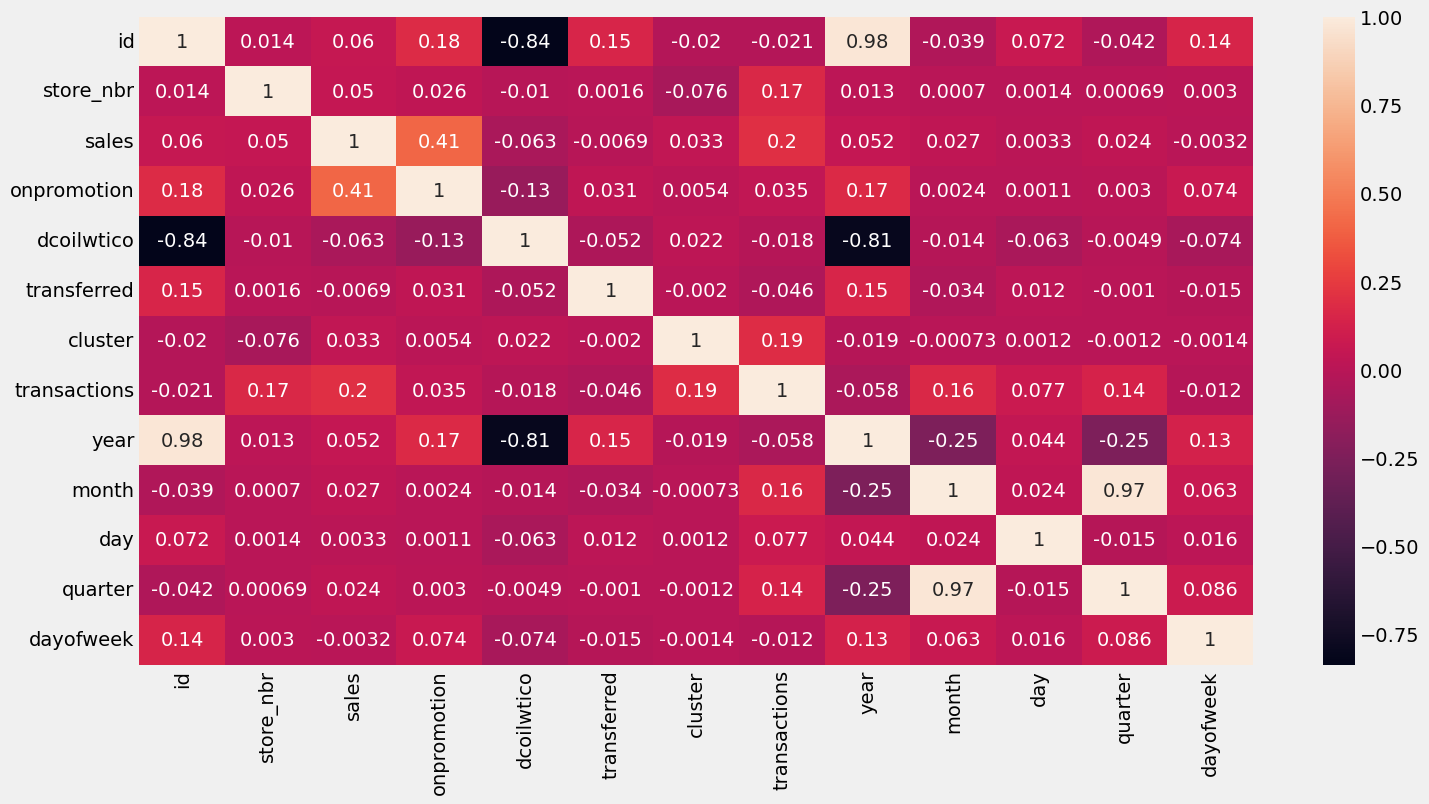

In [38]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),annot=True)

In [39]:
data['transferred'].value_counts()

False    572616
True      27390
Name: transferred, dtype: int64

# converting the categorical values to numerical values for transferred column

In [40]:
data['transferred']=data['transferred'].replace({False:0,True:1})

In [41]:
data

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,event_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions,year,month,day,quarter,dayofweek,dayname
0,73062,2013-02-11,1,AUTOMOTIVE,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,0,Quito,Pichincha,D,13,396,2013,2,11,1,0,Monday
1,73063,2013-02-11,1,BABY CARE,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,0,Quito,Pichincha,D,13,396,2013,2,11,1,0,Monday
2,73064,2013-02-11,1,BEAUTY,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,0,Quito,Pichincha,D,13,396,2013,2,11,1,0,Monday
3,73065,2013-02-11,1,BEVERAGES,172.000,0,97.01,Holiday,National,Ecuador,Carnaval,0,Quito,Pichincha,D,13,396,2013,2,11,1,0,Monday
4,73066,2013-02-11,1,BOOKS,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,0,Quito,Pichincha,D,13,396,2013,2,11,1,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,3000883,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,0,Quito,Pichincha,B,6,2155,2017,8,15,3,1,Tuesday
322043,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,0,Quito,Pichincha,B,6,2155,2017,8,15,3,1,Tuesday
322044,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,0,Quito,Pichincha,B,6,2155,2017,8,15,3,1,Tuesday
322045,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,0,Quito,Pichincha,B,6,2155,2017,8,15,3,1,Tuesday


In [42]:
data=data.drop('date',axis=1)

In [43]:
data

,id,store_nbr,family,sales,onpromotion,dcoilwtico,event_type,locale,locale_name,description,transferred,city,state,store_type,cluster,transactions,year,month,day,quarter,dayofweek,dayname
0,73062,1,AUTOMOTIVE,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,0,Quito,Pichincha,D,13,396,2013,2,11,1,0,Monday
1,73063,1,BABY CARE,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,0,Quito,Pichincha,D,13,396,2013,2,11,1,0,Monday
2,73064,1,BEAUTY,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,0,Quito,Pichincha,D,13,396,2013,2,11,1,0,Monday
3,73065,1,BEVERAGES,172.000,0,97.01,Holiday,National,Ecuador,Carnaval,0,Quito,Pichincha,D,13,396,2013,2,11,1,0,Monday
4,73066,1,BOOKS,0.000,0,97.01,Holiday,National,Ecuador,Carnaval,0,Quito,Pichincha,D,13,396,2013,2,11,1,0,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,3000883,9,POULTRY,438.133,0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,0,Quito,Pichincha,B,6,2155,2017,8,15,3,1,Tuesday
322043,3000884,9,PREPARED FOODS,154.553,1,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,0,Quito,Pichincha,B,6,2155,2017,8,15,3,1,Tuesday
322044,3000885,9,PRODUCE,2419.729,148,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,0,Quito,Pichincha,B,6,2155,2017,8,15,3,1,Tuesday
322045,3000886,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,0,Quito,Pichincha,B,6,2155,2017,8,15,3,1,Tuesday


# # converting the categorical values to numerical values by get dummies

In [44]:
data=pd.get_dummies(data)

In [45]:
data

,id,store_nbr,sales,onpromotion,dcoilwtico,transferred,cluster,transactions,year,month,day,quarter,dayofweek,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,event_type_Additional,event_type_Bridge,event_type_Event,event_type_Holiday,event_type_Transfer,locale_Local,locale_National,locale_Regional,locale_name_Ambato,locale_name_Cayambe,locale_name_Cotopaxi,locale_name_Cuenca,locale_name_Ecuador,locale_name_El Carmen,locale_name_Esmeraldas,locale_name_Guaranda,locale_name_Guayaquil,locale_name_Ibarra,locale_name_Imbabura,locale_name_Latacunga,locale_name_Libertad,locale_name_Loja,locale_name_Machala,locale_name_Manta,locale_name_Puyo,locale_name_Quevedo,locale_name_Quito,locale_name_Riobamba,locale_name_Salinas,locale_name_Santa Elena,locale_name_Santo Domingo,locale_name_Santo Domingo de los Tsachilas,description_Batalla de Pichincha,description_Black Friday,description_Cantonizacion de Cayambe,description_Cantonizacion de El Carmen,description_Cantonizacion de Guaranda,description_Cantonizacion de Latacunga,description_Cantonizacion de Libertad,description_Cantonizacion de Quevedo,description_Cantonizacion de Riobamba,description_Cantonizacion de Salinas,description_Cantonizacion del Puyo,description_Carnaval,description_Cyber Monday,description_Dia de Difuntos,description_Dia del Trabajo,description_Fundacion de Ambato,description_Fundacion de Cuenca,description_Fundacion de Esmeraldas,description_Fundacion de Guayaquil,description_Fundacion de Guayaquil-1,description_Fundacion de Ibarra,description_Fundacion de Loja,...,description_Fundacion de Quito-1,description_Fundacion de Riobamba,description_Fundacion de Santo Domingo,description_Inauguracion Mundial de futbol Brasil,description_Independencia de Ambato,description_Independencia de Cuenca,description_Independencia de Guaranda,description_Independencia de Guayaquil,description_Independencia de Latacunga,description_Mundial de futbol Brasil: Ecuador-Francia,description_Mundial de futbol Brasil: Ecuador-Honduras,description_Mundial de futbol Brasil: Octavos de Final,description_Mundial de futbol Brasil: Semifinales,description_Navidad+1,description_Navidad-1,description_Navidad-2,description_Navidad-3,description_Navidad-4,description_Primer Grito de Independencia,description_Primer dia del ano-1,description_Provincializacion Santa Elena,description_Provincializacion de Cotopaxi,description_Provincializacion de Imbabura,description_Provincializacion de Santo Domingo,description_Puente Dia de Difuntos,description_Puente Navidad,description_Puente Primer dia del ano,description_Terremoto Manabi+10,description_Terremoto Manabi+11,description_Terremoto Manabi+12,description_Terremoto Manabi+13,description_Terremoto Manabi+16,description_Terremoto Manabi+17,description_Terremoto Manabi+18,description_Terremoto Manabi+19,description_Terremoto Manabi+2,description_Terremoto Manabi+20,description_Terremoto Manabi+23,description_Terremoto Manabi+24,description_Terremoto Manabi+25,description_Terremoto Manabi+26,description_Terremoto Manabi+27,description_Terremoto Manabi+3,description_Terremoto Manabi+30,description_Terremoto Manabi+4,description_Terremoto Manabi+5,description_Terremoto Manabi+6,description_Terremoto Manabi+9,description_Traslado Batalla de Pichincha,description_Traslado Independencia de Guayaquil,description_Traslado Primer Grito de Independencia,description_Viernes Santo,city_Ambato,city_Babahoyo,city

# extracting dependence and independence features

In [46]:
X=data.drop('sales',axis=1)
y=data['sales']

# splitting the data to train and text 

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [48]:
X_train.shape

(450004, 202)

In [49]:
X_test.shape

(150002, 202)

# using xgbregressor to predict sales

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error,mean_absolute_error
xgb=XGBRegressor(learning_rate=.6,n_estimators=300)
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

In [ ]:
msle = mean_squared_log_error(abs(y_test), abs(y_pred), squared=False)
print("Mean Squared Log Error:", msle)

# comparing between actual and prediction

In [ ]:
pd.DataFrame((y_pred),(y_test))

# using random forest regressor model for sales prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
predict=RFR.predict(X_test)
print(mean_absolute_error(y_test,predict))

In [ ]:
msle = mean_squared_log_error(abs(y_test), abs(predict), squared=False)
print("Mean Squared Log Error:", msle)

In [ ]:
pd.DataFrame((predict),(y_test))

# As we see the random forest regressor is much better than xgbregressor and more accurate for sales prediction